In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Load the GeoJSON file for districts
geojson_path = './geodata/small_bangladesh_geojson_adm1_8_divisions_bibhags.json'
divisions = gpd.read_file(geojson_path)

In [2]:
division_data = {
    "Dhaka": 35.44,
    "Chittagong": 27.51,
    "Khulna": 10.70,
    "Barisal": 3.65,
    "Rajshahi": 5.12,
    "Sylhet": 14.20,
    "Rangpur": 1.51,
    "Mymensingh": 1.85,
}

divisions['Infected'] = divisions["ADM1_EN"].map(division_data).fillna(0)

/tmp/ipykernel_53584/120844502.py:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle(


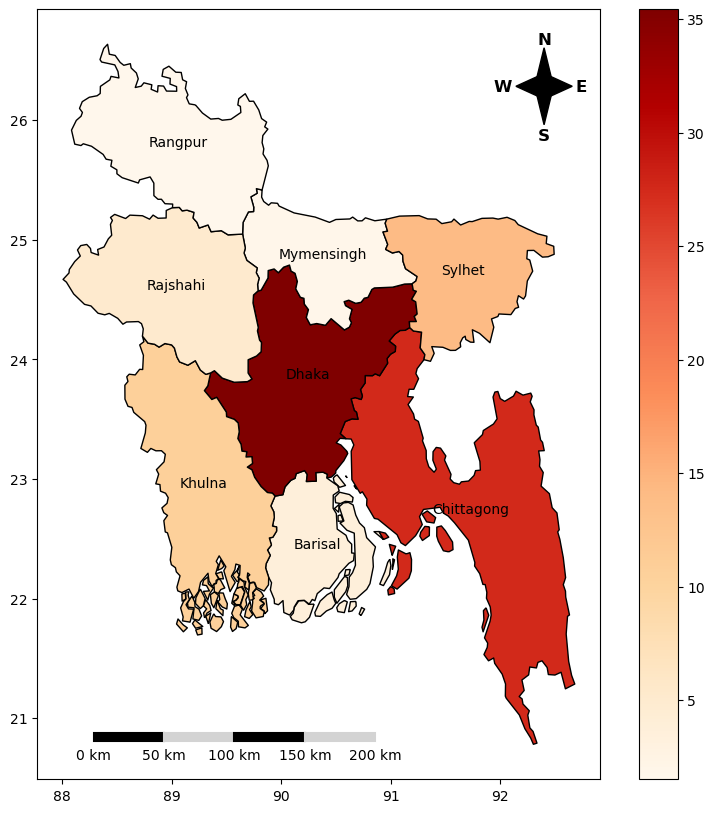

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = divisions.plot(
    ax=ax, edgecolor="black", column="Infected", markersize=10, legend=True, cmap="OrRd"
)

divisions.apply(
    lambda x: ax.annotate(
        text=x.ADM1_EN, xy=x.geometry.centroid.coords[0], ha="center"
    ),
    axis=1,
)

# Add intersecting arrows for North, South, East, and West
arrow_length = 0.05  # Length of each arrow in axes coordinates
arrow_base_x, arrow_base_y = 0.9, 0.9  # Base of the arrows in axes coordinates

# North Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y + arrow_length + 0.005, 'N', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# South Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, 0, -arrow_length, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x, arrow_base_y - arrow_length - 0.02, 'S', ha='center', fontsize=12, transform=ax.transAxes, weight='bold')

# East Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x + arrow_length + 0.005, arrow_base_y, 'E', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# West Arrow
ax.add_patch(FancyArrow(
    arrow_base_x, arrow_base_y, -arrow_length, 0, color='black',
    width=0.01, length_includes_head=True, transform=ax.transAxes
))
ax.text(arrow_base_x - arrow_length - 0.04, arrow_base_y, 'W', va='center', fontsize=12, transform=ax.transAxes, weight='bold')

# Add Scale Bar right below the map, in km. Length of 0-200 km in 50 km intervals in black and white colors boxes.
scale_bar_x = 0.1  # Starting x position (axes coordinates)
scale_bar_y = 0.05  # Starting y position (axes coordinates)
scale_bar_length = 0.5  # Total length of the scale bar (axes fraction)
scale_bar_height = 0.01  # Height of the scale bar (axes fraction)
segment_length = scale_bar_length / 4  # Length of each segment (4 segments for 0-200 km)
scale_bar_colors = ['black', 'white']  # Alternating colors for the segments

# Create the scale bar with alternating colors
for i in range(4):  # 4 segments (0-50, 50-100, 100-150, 150-200)
    ax.add_patch(plt.Rectangle(
        (scale_bar_x + i * segment_length, scale_bar_y),  # Bottom-left corner of the segment
        segment_length, scale_bar_height,  # Width and height of the segment
        color='black' if i % 2 == 0 else 'lightgray',  # Alternate between black and gray
        transform=ax.transAxes,  # Use axes-relative coordinates
        edgecolor='black',  # Add a border to each segment
        linewidth=1.5
    ))

# Add labels below the scale bar
for i, label in enumerate(range(0, 201, 50)):  # Labels: 0, 50, 100, 150, 200
    ax.text(
        scale_bar_x + i * segment_length, scale_bar_y - 0.01,  # Position below each segment
        f'{label} km', ha='center', va='top', fontsize=10, transform=ax.transAxes
    )